In [1]:

%load_ext autoreload
%autoreload 2
from anapath.params import *

In [3]:
from anapath.image.manip import load_slide,  contour_cells, slide_cut, select_random_files_by_index, move_unselected_files2, load_image
from anapath.image.visu import visualize_tiles_from_global_csv, display_image

/mnt/c/Users/grego/Documents/Projet_ML/Data/TREATED/normal/02234.mrxs


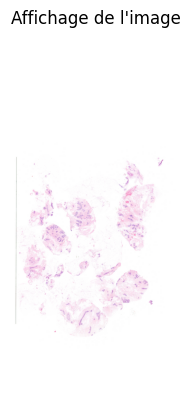

In [6]:
filename = "02234"
slide, thumbnail = load_slide(filename,treated_normal_path)
display_image(thumbnail)

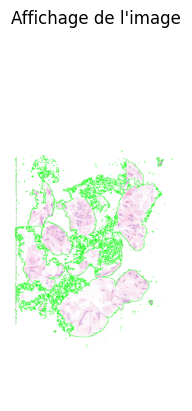

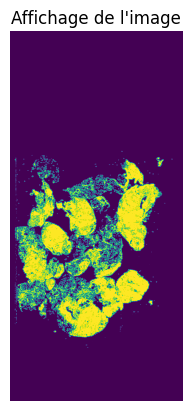

(None, None)

In [23]:
image_to_show, mask, contours = contour_cells(thumbnail_np=thumbnail)
display_image(image_to_show), display_image(mask)


In [28]:
output_path=f"{treated_normal_path}/../.."
tiles_saved, execution_time, tilecsv = slide_cut(slide, thumbnail, contours, filename,
              output_path, level=0, tile_size_l=tile_size_l, tile_size_h=tile_size_h,
              min_size_mb=min_size_mb, max_workers=8, global_csv_path="2234_coordinates.csv")

Début du traitement du fichier 02234...
Fin du traitement du fichier 02234 en 695.13 secondes
48 tuiles générées à partir du fichier 02234
Coordonnées ajoutées au fichier global: /mnt/c/Users/grego/Documents/Projet_ML/Data/TREATED/normal/../../2234_coordinates.csv


In [38]:
global_csv_file = f"{output_path}/2234_coordinates.csv"
images = visualize_tiles_from_global_csv(global_csv_file,treated_normal_path, output_path)

Visualisation des tuiles pour 02234...
/mnt/c/Users/grego/Documents/Projet_ML/Data/TREATED/normal/02234.mrxs
105472
Image sauvegardée: /mnt/c/Users/grego/Documents/Projet_ML/Data/TREATED/normal/../../02234_visualization.png


In [43]:
list_file_selected = select_random_files_by_index(output_path,5)
len(list_file_selected['02234'])

5

In [ ]:
#Déplace les fichiers non selection dans un répertoire no select
#move_unselected_files(output_path,list_file_selected)

In [32]:
# Charger une image png avec cv2
import cv2
filename = f"{train_tumor_path}/tile_01092_c66_r1_c1.png"
image_ = load_image(filename)
image_.shape
rgb_channels = image_[:,:,:3]

In [25]:
rgb_channels.shape

(512, 256, 3)

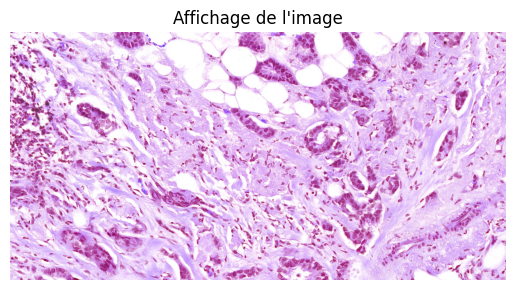

In [17]:
display_image(rgb_channels)

In [11]:
import cv2
import numpy as np
#hsv = cv2.cvtColor(image_, cv2.COLOR_BGR2HSV)
#gray=cv2.cvtColor(image_,cv2.COLOR_BGR2GRAY)
#cv2.namedWindow('hsv', cv2.WINDOW_NORMAL)
cv2.waitKey(0)
cv2.destroyAllWindows()

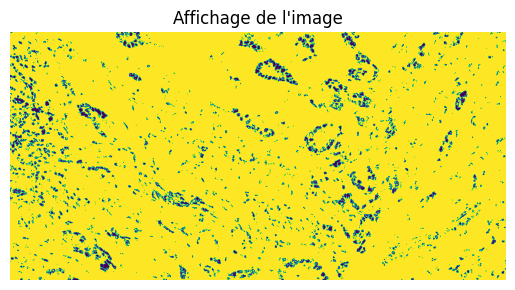

In [33]:
rgb_channels=cv2.resize(rgb_channels,(1024,512))
gray=cv2.cvtColor(rgb_channels,cv2.COLOR_BGR2GRAY)
#ret,th=cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
#mask = cv2.inRange(gray, 0, 50)  # Ne garde que les pixels entre 0 et 70
mask = cv2.inRange(gray, 0,110)  # Crée un masque binaire: 255 pour pixels entre 0-30, 0 pour les autres
result = np.ones_like(gray) * 255  # Créer une image toute blanche
result[mask == 255] = 0  # Mettre les pixels du masque en noir
#cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.imshow('image',th)
cv2.waitKey(0)
cv2.destroyAllWindows()
display_image(result)

In [34]:
cv2.imwrite('image_resultat.png', result)

True